In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# requirements for regression
# Linearity Assumption
# Homoscedasticity
# Normality
# Multicollinearity

In [76]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv"
data=pd.read_csv(path)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [78]:
data.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
# checking the null value
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [80]:
# car_id should be unique
sum(data.duplicated(subset = 'car_ID'))

0

In [81]:
# let's look into some of our object variables first. Using unique() function, we will describe all categories
# Let's find the categorical variable
categorical_variable = data.select_dtypes(object)
for col_name in categorical_variable.columns.tolist():
  print(col_name, ":: ",data[col_name].unique())

# data["CarName"].unique()

CarName ::  ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick

In [82]:
# We can see that the 'CarName' includes both the company name (brand) and the car model. Next, we want to split a company name from the model of a car, as for our model building purpose, we will focus on a company name only.
data['brand']= data.CarName.str.split(' ').str.get(0).str.lower()
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [83]:
# There are some typos in the names of the cars, so they should be corrected.
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

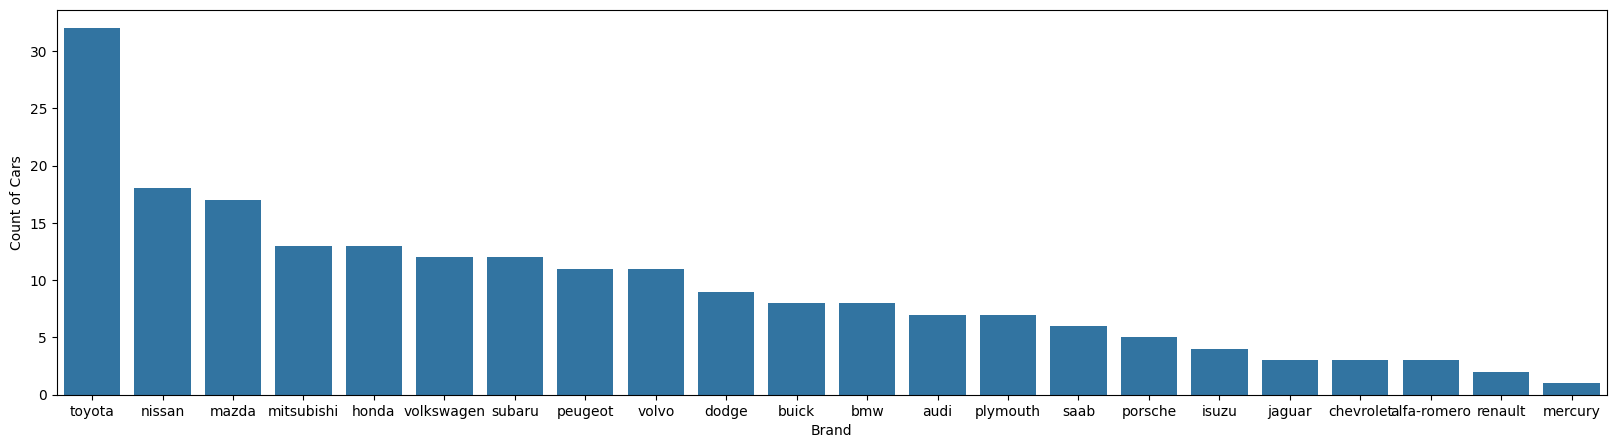

<Figure size 640x480 with 0 Axes>

In [84]:
# let's plot and sort the total number of Brands.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize = (20,5))
plt1 = sns.countplot(x=data['brand'], order=pd.value_counts(data['brand']).index)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

In [85]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)
# We can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [87]:
# Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'.
data_comp_avg_price= data[['brand','price']].groupby('brand',as_index = False).mean().rename(columns={'price':'brand_avg_price'})
data_comp_avg_price

,brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.500000
8,jaguar,34600.000000
9,mazda,10652.882353


In [88]:
data = data.merge(data_comp_avg_price, on = 'brand')
# merge with the main data

In [89]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [90]:
data['brand_category']=data.brand_avg_price.apply(lambda x: "Budget" if x < 10000 else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))
data.brand_category

0      Mid_Range
1      Mid_Range
2      Mid_Range
3      Mid_Range
4      Mid_Range
         ...    
200    Mid_Range
201    Mid_Range
202    Mid_Range
203    Mid_Range
204    Mid_Range
Name: brand_category, Length: 205, dtype: object

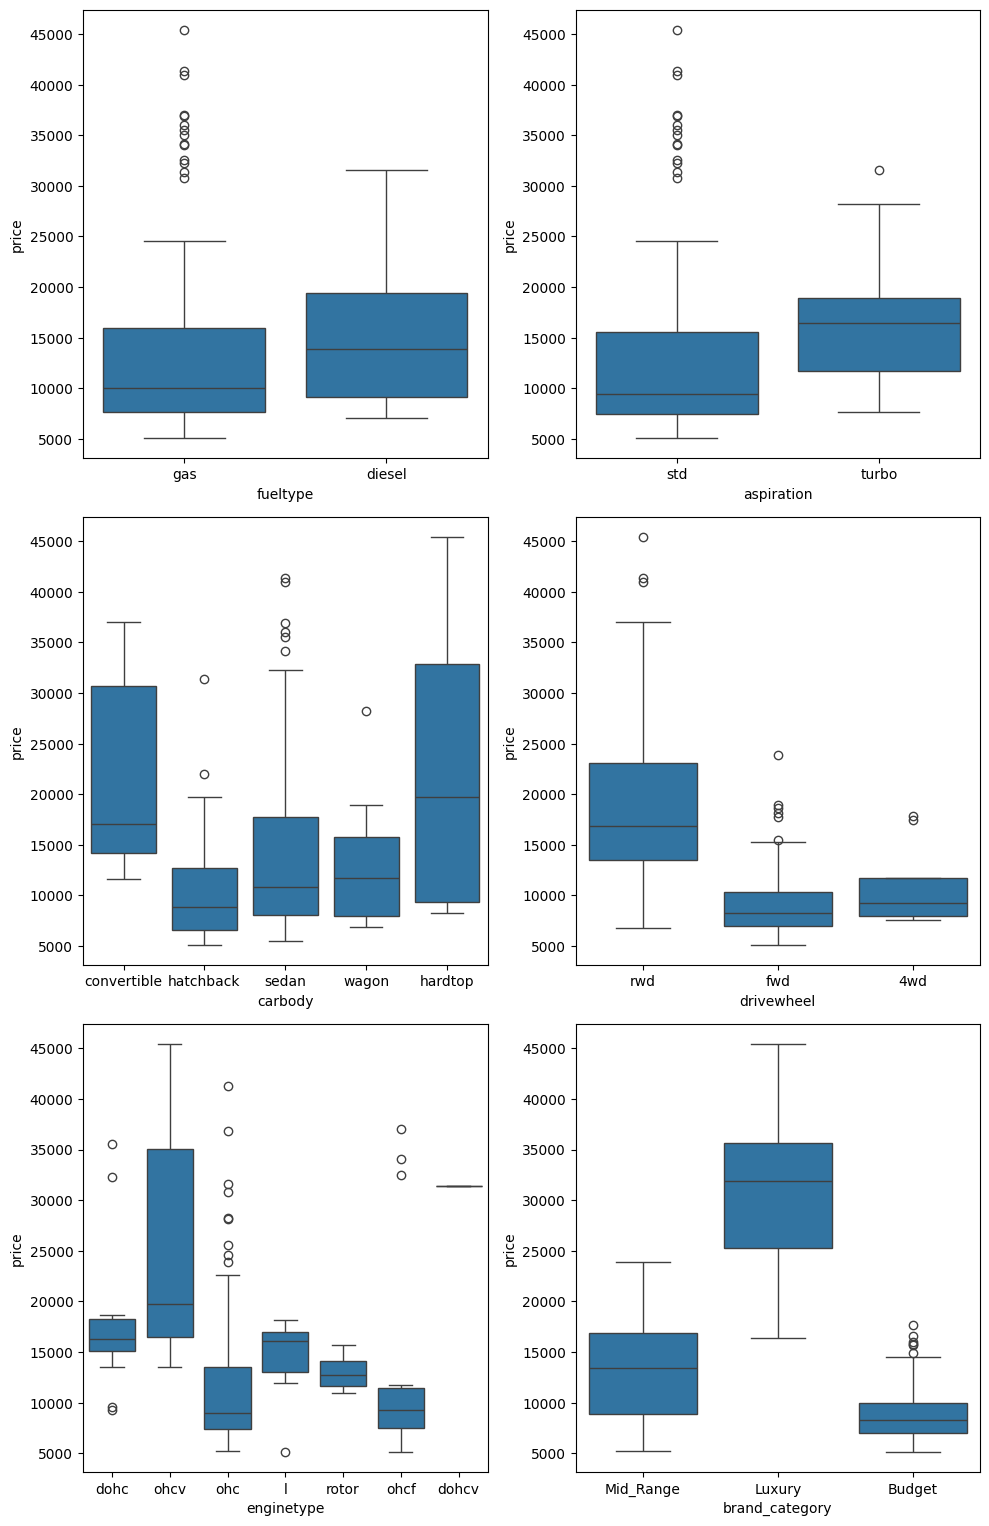

In [91]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

# We will use the boxplot() function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the price.

In [92]:
# Next, let's view the list of top features that have high correlation coefficient. The corr() function calculates the Pearson's correlation coefficients with respect to the 'price'.
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-92-5bfffafcd435>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [96]:
# We can also use the heatmap() or pairplot() to further explore the relationship between all features and the target variables
# sns.heatmap(data[numerical_variable])
# plt.show()

In [97]:
# Since we fit a linear model, we assume that the relationship between the target (price) and other features is linear.

# We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response (dependent) variable doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as Homoscedasticity.


# We also assume that the observations are independent of one another (no multicollinearity), and there is no correlation between the sequential observations.

# If we see one of these assumptions in the dataset are not met, it's more likely that the other ones, mentioned above, will also be violated. Luckily, we can check and fix these assumptions with a few unique techniques.

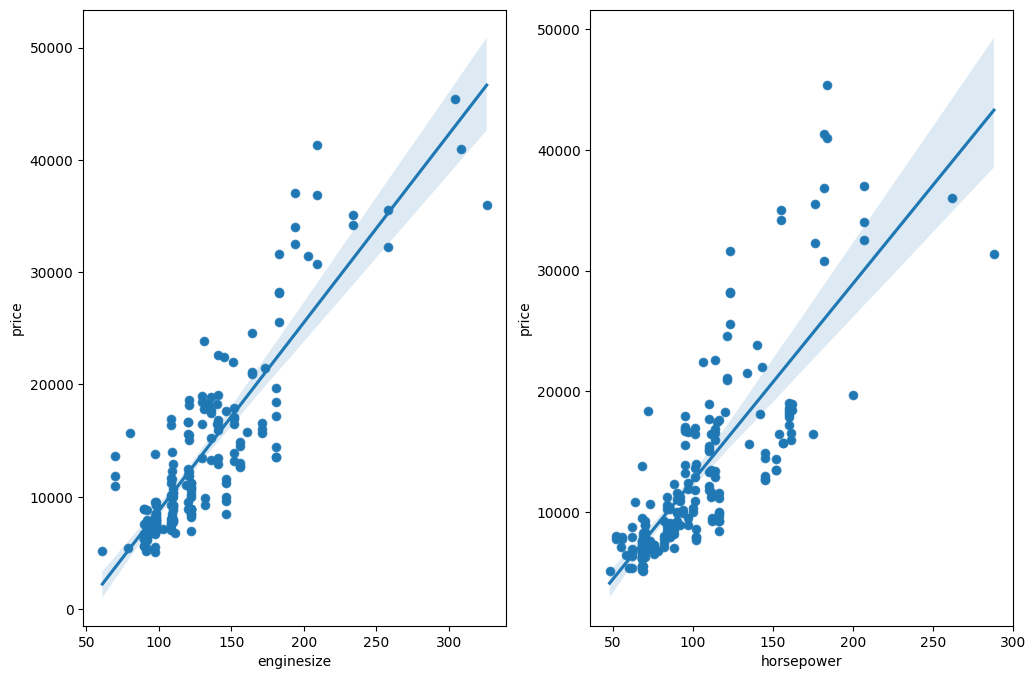

In [98]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data.enginesize, y = data.price,  ax=ax1)
sns.regplot(x=data.enginesize, y=data.price, ax=ax1)

sns.scatterplot(x = data.horsepower,y = data.price, ax=ax2)
sns.regplot(x=data.horsepower, y=data.price, ax=ax2);
# 1. Linearity Assumption

<Axes: xlabel='enginesize', ylabel='price'>

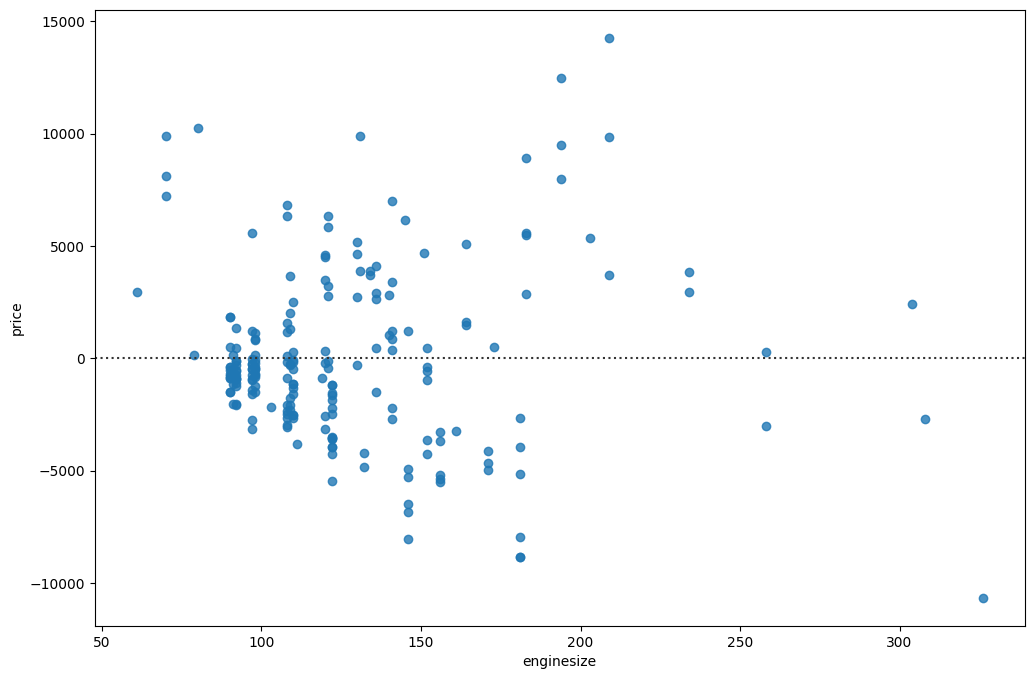

In [99]:
# Homoscedasticity:there is a constant variance present in the response variable as the predictor variable increases.
plt.subplots(figsize = (12,8))
sns.residplot(x=data["enginesize"], y=data["price"])

In [100]:
# Normality
previous_data = data.copy()
normaltest(data.price.values)


NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

In [101]:
data['price'] = np.log(data['price'])
normaltest(data.price.values)
# As we can see, the log method transformed the car 'price' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed.


NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

In [102]:
# Multicollinearity
# *Multicollinearity* is when there is a strong correlation between the independent variables.
# by using heatmap and corr function , we can analyze this one
# As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and let the models (e.x. Regularization models such as Lasso, Ridge in the next lab) do the clean up later on.

corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-102-f5578066d6bc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


price               1.000000
curbweight          0.891237
brand_avg_price     0.836639
enginesize          0.831985
horsepower          0.825835
carwidth            0.802544
carlength           0.767864
wheelbase           0.629401
boreratio           0.610565
carheight           0.162798
stroke              0.097992
compressionratio    0.085144
peakrpm            -0.088454
citympg            -0.771615
highwaympg         -0.775197
Name: price, dtype: float64

In [103]:
# let's remove other uncontributed variable
data.drop(columns=["stroke","compressionratio","peakrpm","carheight"],inplace=True)

In [104]:
categorical_variable= data.select_dtypes(object)
categorical_variable.columns


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand',
       'brand_category'],
      dtype='object')

In [105]:
categorical_variable.drop(columns=['doornumber','enginelocation','brand','fuelsystem'], inplace=True)

In [106]:
numerical_variable=list(set(data.columns)-set(categorical_variable))
numerical_variable

['wheelbase',
 'carwidth',
 'highwaympg',
 'boreratio',
 'doornumber',
 'enginesize',
 'carlength',
 'fuelsystem',
 'brand',
 'price',
 'brand_avg_price',
 'horsepower',
 'curbweight',
 'citympg',
 'enginelocation']

In [108]:
selected_column=(numerical_variable).copy()
selected_column.extend(categorical_variable.columns)
selected_column


['wheelbase',
 'carwidth',
 'highwaympg',
 'boreratio',
 'doornumber',
 'enginesize',
 'carlength',
 'fuelsystem',
 'brand',
 'price',
 'brand_avg_price',
 'horsepower',
 'curbweight',
 'citympg',
 'enginelocation',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'brand_category']

In [109]:
data=data[selected_column]

In [110]:
# We can split the data into the features X and target y.
X=data.drop("price",axis=1)
Y=data["price"]

In [111]:
# let's see distribution of categorical variable
for column in categorical_variable:
  print("column name:",column)
  print("value_count:")
  print(X[column].value_counts())

column name: fueltype
value_count:
gas       185
diesel     20
Name: fueltype, dtype: int64
column name: aspiration
value_count:
std      168
turbo     37
Name: aspiration, dtype: int64
column name: carbody
value_count:
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
column name: drivewheel
value_count:
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
column name: enginetype
value_count:
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
column name: cylindernumber
value_count:
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
column name: brand_category
value_count:
Budget       95
Mid_Range    86
Luxury       24
Name: brand_category, dtype: int64


In [112]:
data = pd.get_dummies(data, drop_first = True)
data

,wheelbase,carwidth,highwaympg,boreratio,enginesize,carlength,price,brand_avg_price,horsepower,curbweight,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,brand_category_Luxury,brand_category_Mid_Range
0,88.6,64.1,27,3.47,130,168.8,9.510075,15498.333333,111,2548,...,0,0,0,1,0,0,0,0,0,1
1,88.6,64.1,27,3.47,130,168.8,9.711116,15498.333333,111,2548,...,0,0,0,1,0,0,0,0,0,1
2,94.5,65.5,26,2.68,152,171.2,9.711116,15498.333333,154,2823,...,1,0,0,0,1,0,0,0,0,1
3,99.8,66.2,30,3.19,109,176.6,9.543235,17859.166714,102,2337,...,0,0,0,1,0,0,0,0,0,1
4,99.4,66.4,22,3.19,136,176.6,9.767095,17859.166714,115,2824,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,68.9,28,3.78,141,188.8,9.731809,18063.181818,114,2952,...,0,0,0,1,0,0,0,0,0,1
201,109.1,68.8,25,3.78,141,188.8,9.854560,18063.181818,160,3049,...,0,0,0,1,0,0,0,0,0,1
202,109.1,68.9,23,3.58,173,188.8,9.975110,18063.181818,134,3012,...,1,0,0,0,1,0,0,0,0,1
203,109.1,68.9,27,3.01,145,188.8,10.019936,18063.181818,106,3217,...,0,0,0,0,1,0,0,0,0,1


In [113]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data.drop(columns=['price']), data['price'], test_size=0.30, random_state=0)

In [115]:
X_train=ss.fit_transform(X_train)

In [116]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [117]:
X_test=ss.transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions

array([ 8.79176071,  9.71443628,  9.46432175,  8.49500971,  9.20064278,
        9.32928455,  8.58502398,  8.79558259,  9.66532155,  8.87872938,
        9.88099963, 10.89368534,  9.4492526 ,  9.49721583,  8.40103485,
        9.29523923,  9.24834015,  9.76338599,  9.0634177 ,  8.89831751,
        9.14623876,  9.55649532,  9.25182064,  9.36970887,  9.7085854 ,
        8.84176991,  8.9114635 ,  9.57269457,  8.96976339,  8.81771068,
        9.07256801,  9.25428962, 10.12848791,  9.11172843,  8.92151606,
       10.2573668 ,  9.28054493,  9.67324484,  8.68753531, 10.40821874,
        8.30362563,  9.58135282, 10.52888379,  9.37290361,  9.2840878 ,
        8.83163736,  8.79939273,  9.43494462,  9.20343077,  9.18414016,
       10.05278929,  8.70964136,  8.95524923,  9.10200814,  9.98151851,
        9.74809392,  9.1028544 ,  9.92737561,  9.16064338,  8.81052918,
        8.45128586,  9.5011054 ])

In [118]:
lm.score(X_test,y_test)

0.8313033562134503

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test,car_price_predictions)

0.8313033562134503

In [120]:
# we can als use pipeline object
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [121]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse

0.20835273578335628

In [122]:
r2_score(car_price_predictions, y_test)

0.8442470234878404

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wheelbase                 205 non-null    float64
 1   carwidth                  205 non-null    float64
 2   highwaympg                205 non-null    int64  
 3   boreratio                 205 non-null    float64
 4   enginesize                205 non-null    int64  
 5   carlength                 205 non-null    float64
 6   price                     205 non-null    float64
 7   brand_avg_price           205 non-null    float64
 8   horsepower                205 non-null    int64  
 9   curbweight                205 non-null    int64  
 10  citympg                   205 non-null    int64  
 11  doornumber_two            205 non-null    uint8  
 12  fuelsystem_2bbl           205 non-null    uint8  
 13  fuelsystem_4bbl           205 non-null    uint8  
 14  fuelsystem

In [125]:
# Polynoimal features helps to cover no linear relation between price and other variable
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
# to find the best hyperparamer we have GridSearchCV
param_grid = {
    "polynomial__degree": [1, 2, 3],
}

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)


search = GridSearchCV(pipe,param_grid,n_jobs=1)


In [126]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [127]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [129]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [133]:
predicted_traningData=best.predict(X_train)
r2_score(predicted_traningData, y_train)
# checking underfitting

0.9702995403397148

In [131]:
predicted=best.predict(X_test)
r2_score(predicted, y_test)
# checking overfitting

0.8442470234878409

In [135]:
# let's do cross validation
X=data.drop(columns=['price'])
y=data['price']
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  2  5  7  8  9 10 11 12 13] 136
Test index: [ 0  3  4  6 15 16 19 26 33 34] 69

Train index: [ 0  2  3  4  6  7 10 12 13 14] 137
Test index: [ 1  5  8  9 11 17 21 22 25 27] 68

Train index: [ 0  1  3  4  5  6  8  9 11 15] 137
Test index: [ 2  7 10 12 13 14 18 20 23 24] 68



In [138]:
#from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :],
                                        X.iloc[test_index, :],
                                        y[train_index],
                                        y[test_index])

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    score = r2_score(y_test, y_pred)

    scores.append(score)

scores

[0.9320511434874656, 0.9061604838417484, 0.8738866246380929]

In [139]:
estimator = Pipeline([
                      ("regression", lr)])

kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [142]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [143]:
r2_score(y, predictions)

0.9057526648095033

In [144]:
np.mean(scores)

0.904032750655769

In [145]:
# Hyperparameter tuning involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that generalizes well outside of your sample.
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas


array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [147]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
score_laso = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)

    estimator = Pipeline([

        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)

    score = r2_score(y, predictions)

    score_laso.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.134e-01, tolerance: 3.180e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.164e-01, tolerance: 3.694e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.409e-01, tolerance: 3.476e

In [149]:
list(zip(alphas,score_laso))

[(1e-09, 0.9016452883358916),
 (1e-08, 0.9034155141828303),
 (1e-07, 0.9003846578679267),
 (1e-06, 0.9019318286171005),
 (1e-05, 0.9054136336264239),
 (0.0001, 0.9150071104783271),
 (0.001, 0.9192790560424375),
 (0.01, 0.9025652544750022),
 (0.1, 0.8943201753118596),
 (1.0, 0.8861382582804624)]

In [151]:
Lasso(alpha=1e-3).fit(X, y).coef_

array([-3.47585066e-04,  1.90714699e-02,  5.94615352e-03, -0.00000000e+00,
       -8.77781298e-05, -3.26399985e-04,  1.67734782e-05,  1.82561306e-03,
        4.13317753e-04, -1.08849822e-02, -0.00000000e+00, -8.45421524e-02,
        0.00000000e+00,  5.65728835e-03,  0.00000000e+00,  1.55226197e-02,
       -0.00000000e+00, -0.00000000e+00,  3.75697039e-02,  2.02013794e-01,
       -0.00000000e+00,  3.70456292e-02, -0.00000000e+00,  2.01971827e-02,
        7.51398731e-02, -1.59195928e-01,  5.26575952e-02, -0.00000000e+00,
       -5.04501532e-02, -1.42821189e-02, -1.09702609e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.39291047e-03, -0.00000000e+00, -0.00000000e+00,  3.22674876e-01,
       -5.29957954e-03,  3.21007741e-02, -7.53308155e-03, -6.25848447e-02,
       -1.01596417e-02, -7.95196358e-02, -0.00000000e+00,  2.29193774e-02,
       -0.00000000e+00, -0.00000000e+00, -1.72344774e-03,  0.00000000e+00,
       -7.81407984e-03,  

In [152]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.61360655e-05,  2.05713297e-03,
        4.80908979e-04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

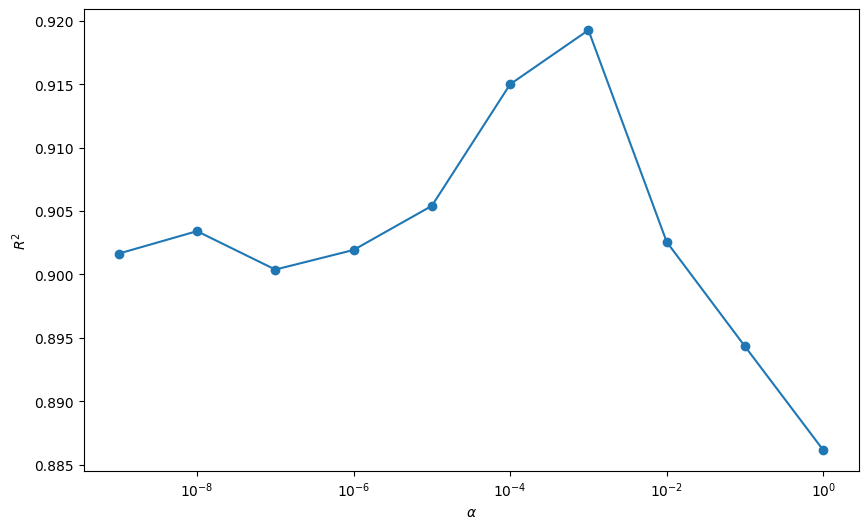

In [153]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [154]:
# To do cross-validation, we used two techniques:
# - use `KFolds` and manually create a loop to do cross-validation
# - use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.

# To do hyper-parameter tuning, we see a general pattern:
# - use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

# Perhaps not surprisingly, there is a function that does this for us -- `GridSearchCV`

from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [155]:
grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255:

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [156]:
grid.best_score_, grid.best_params_

(0.9209929085636893,
 {'polynomial_features__degree': 1, 'ridge_regression__alpha': 4.0})

In [157]:
y_predict = grid.predict(X)

In [158]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.9474111606428177

In [159]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00, -1.56020772e-03,  1.93633657e-02,  7.96564132e-03,
       -8.93758701e-03,  4.45312725e-04,  7.70540042e-04,  1.66189950e-05,
        1.88146939e-03,  3.08735306e-04, -1.42630620e-02, -1.11702703e-02,
       -5.65764120e-02,  3.67497298e-03,  3.30850910e-02,  1.04446472e-02,
        4.93295294e-02,  7.69040663e-03, -2.12115143e-03,  5.26990795e-02,
        9.54491181e-02, -3.31007183e-03,  4.14328048e-02, -1.77569550e-02,
        3.65159050e-02,  6.08160789e-02, -9.86836859e-02,  3.62139550e-02,
       -2.03793473e-02, -5.28062243e-02, -3.34950374e-02, -5.30676333e-02,
       -2.39011133e-02,  3.62789011e-02, -3.53520320e-02,  2.43963317e-02,
       -4.05796645e-02, -2.70601844e-02, -1.36490276e-02, -1.56886693e-02,
        8.37841319e-02, -3.30850910e-02,  4.88271743e-02, -2.66396373e-02,
       -7.52164945e-02, -2.97760087e-02, -7.61623669e-02, -2.20841880e-02,
        2.93865463e-02, -5.07360277e-02, -2.75206154e-02,  1.57658685e-02,
        4.32044673e-02, -

In [173]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)
rmse_vals={}
rmse_vals["linearRegression_rmse"]=linearRegression_rmse

0.17732668532256274


In [174]:
# Regulization lesso and ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import RidgeCV
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV=RidgeCV(alphas=alphas,
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)
rmse_vals["ridgeCV_rmse"]=ridgeCV_rmse

15.0 0.15672454006194042


In [175]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=50000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

rmse_vals["lassoCV_rmse"]=lassoCV_rmse

0.0005 0.15044966336028404


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29176665794320406, tolerance: 0.002065926032567622
  model = cd_fast.enet_coordinate_descent_gram(


In [167]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_),
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 62 coefficients, 42 are non-zero with Lasso.


In [168]:
# elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2,
                            l1_ratio=l1_ratios,
                            max_iter=10000).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38775238097923215, tolerance: 0.0025361860845712525
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19646059229579038, tolerance: 0.002380445766621269
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4260993706119378, tolerance: 0.002380445766621269
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617:

In [169]:

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

rmse_vals["elasticNetCV_rmse"]=elasticNetCV_rmse

0.0005 0.9 0.1505717170673082


In [177]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.177327
Ridge,0.156725
Lasso,0.150450
ElasticNet,0.150572


In [178]:
# Stochastic gradient
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet',
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = r2_score(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,0.177327,-1.184386e+36
Ridge,0.156725,-1.110243e+35
Lasso,0.150450,-4.415188e+34
ElasticNet,0.150572,-6.384548e+34
